In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

sns.set()
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

np.random.seed(100)
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
all_data = pd.concat((df_train.loc[:, 'MSSubClass':'SaleCondition'],
                      df_test.loc[:, 'MSSubClass':'SaleCondition']))

In [2]:
from sklearn.datasets import make_regression

<AxesSubplot:xlabel='X', ylabel='y'>

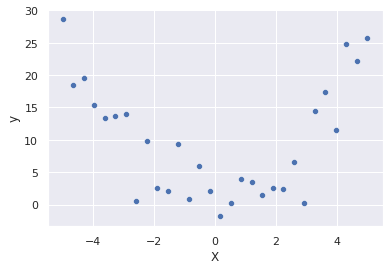

In [155]:
samples = 30
X = np.linspace(0, 10, samples) - 5
y = X ** 2 + np.random.normal(0, 4, samples)
X = X[:, np.newaxis]

df = pd.DataFrame({'X': np.ravel(X),
                   'y': y})
sns.scatterplot(data=df, x='X', y='y')

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8)

In [157]:
def plot_estimator(est, X, y):
    est.fit(X, y)
    plt.scatter(X, y)
    y_pred = est.predict(X)
    plt.step(X, y_pred, c='orange')

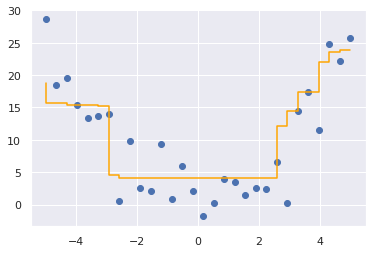

In [158]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),
                            n_estimators=10, learning_rate=0.7)
plot_estimator(ada_clf, X, y)

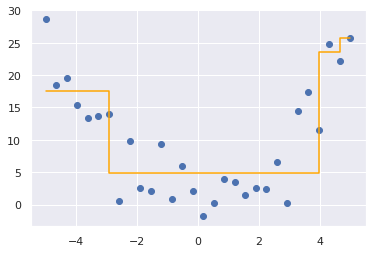

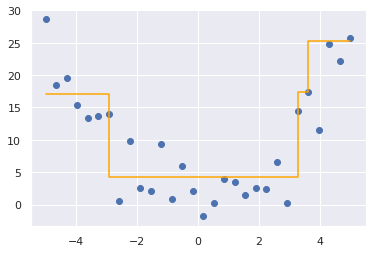

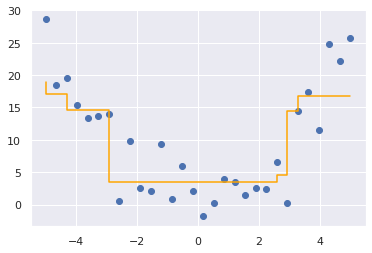

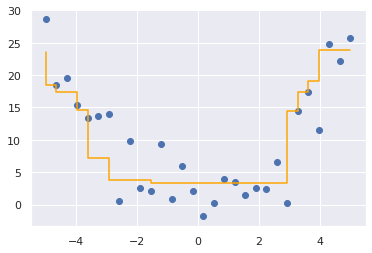

In [159]:
est = DecisionTreeRegressor(max_depth=2)
plot_estimator(est, X, y)
for i in range(1, 4):
    ada_clf = AdaBoostRegressor(est,
                                n_estimators=i*2, learning_rate=0.4)
    plt.figure()
    plot_estimator(ada_clf, X, y)

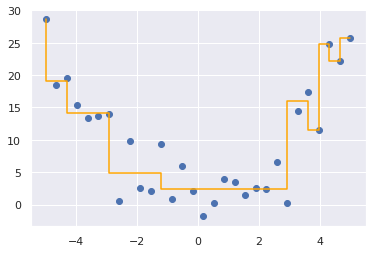

In [160]:
plot_estimator(DecisionTreeRegressor(max_depth=4), X, y)

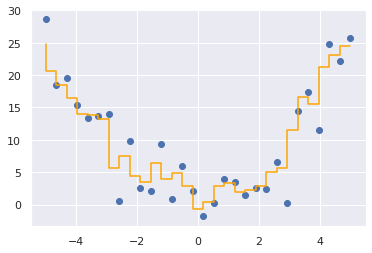

In [161]:
dec_tree_reg = RandomForestRegressor(n_estimators=100, max_depth=10)
plot_estimator(dec_tree_reg, X, y)

Gradient Boosting

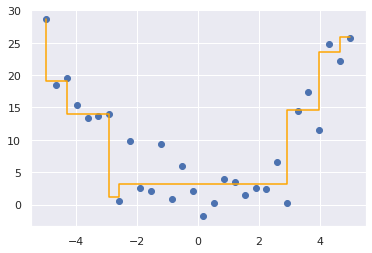

In [163]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
plot_estimator(gbrt, X, y)

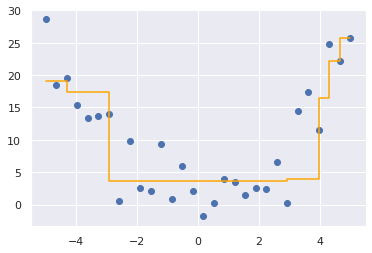

In [164]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),
                            n_estimators=3, learning_rate=1)
plot_estimator(ada_clf, X, y)